<a href="https://colab.research.google.com/github/pkaysantana/SecureDx/blob/main/intrusion_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics opencv-python numpy albumentations torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
import torch
print("GPU Available:", torch.cuda.is_available())

GPU Available: True


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [7]:
from ultralytics import YOLO

# Load YOLOv8 pretrained model
model = YOLO("yolov8n.pt")  # YOLOv8n is lightweight and fast

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 112MB/s]


In [8]:
from google.colab import files
uploaded = files.upload()

Saving input_source_sample.mp4 to input_source_sample.mp4


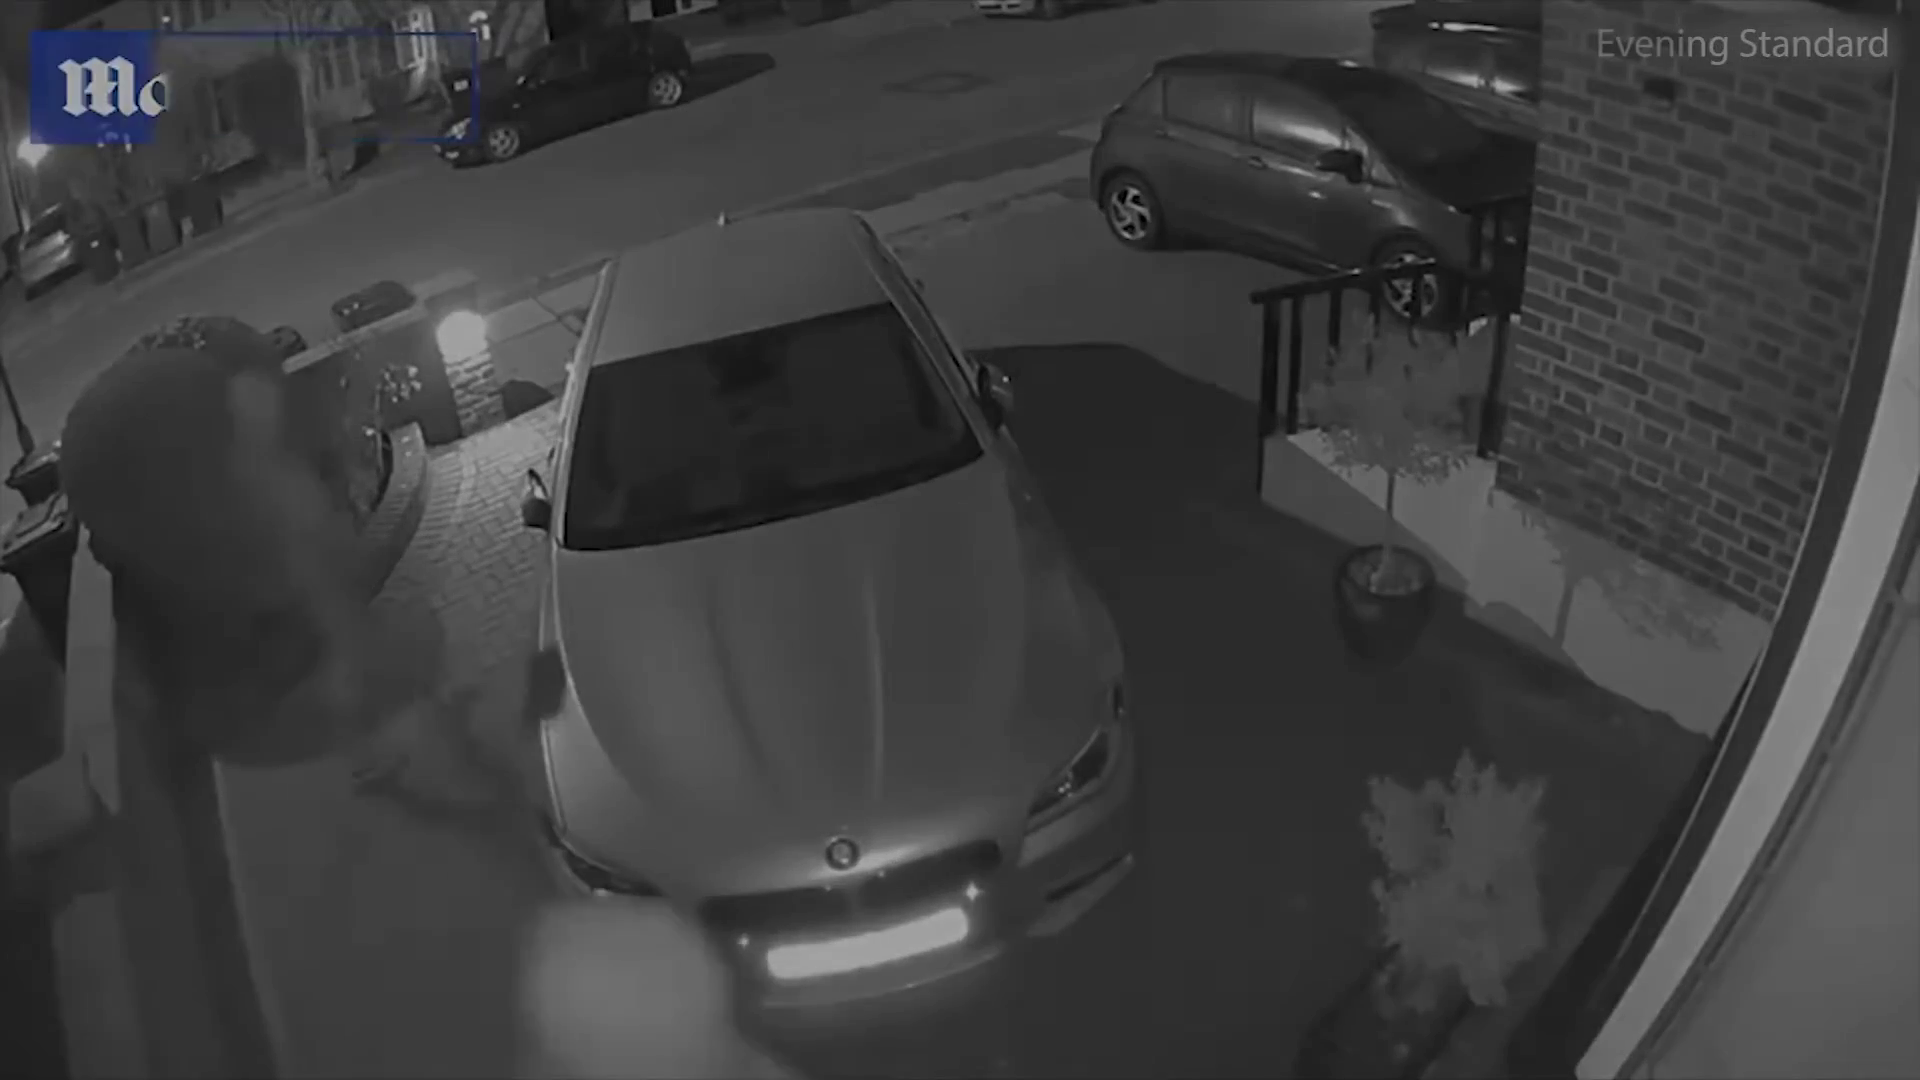

In [ ]:
import cv2
import numpy as np
import time
from datetime import datetime
from IPython.display import display, clear_output
import PIL.Image

# Motion detection parameters
motion_threshold = 30  # Change threshold
frame_history = 3  # Frames to confirm intrusion
confidence_threshold = 0.6  # YOLO detection confidence

# Initialize previous frames for motion detection
previous_frame = None
intrusion_count = 0

def detect_motion(frame):
    """Detects motion using frame differencing."""
    global previous_frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (21, 21), 0)

    if previous_frame is None:
        previous_frame = gray
        return False

    diff = cv2.absdiff(previous_frame, gray)
    _, threshold = cv2.threshold(diff, motion_threshold, 255, cv2.THRESH_BINARY)
    previous_frame = gray

    return np.count_nonzero(threshold) > 5000  # Motion detected if enough pixel changes

def log_intrusion():
    """Logs detected intrusions."""
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    log_entry = f"[{timestamp}] Intrusion detected!\n"
    with open("intrusion_log.txt", "a") as log_file:
        log_file.write(log_entry)
    print(log_entry)

def process_video(video_path):
    """Processes video for intrusion detection."""
    global intrusion_count
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if detect_motion(frame):  # Run YOLO only if motion is detected
            results = model(frame)
            person_detected = False

            for result in results.xyxy[0]:
                x1, y1, x2, y2, conf, cls = result.tolist()
                if cls == 0 and conf > confidence_threshold:  # Class 0 = Person
                    person_detected = True
                    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

            # Track consecutive detections
            if person_detected:
                intrusion_count += 1
                if intrusion_count >= frame_history:
                    log_intrusion()
                    intrusion_count = 0  # Reset counter
            else:
                intrusion_count = 0

        # Convert frame to display in Colab
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = PIL.Image.fromarray(frame_rgb)
        clear_output(wait=True)  # Clears previous frame
        display(img)

    cap.release()
    print("Video processing completed.")

# Run the system on uploaded video
process_video("input_source_sample.mp4")


In [3]:
import cv2
import numpy as np
from ultralytics import YOLO
from datetime import datetime
from IPython.display import display, clear_output
import PIL.Image

# Load trained YOLOv8 model
model = YOLO("runs/detect/train/weights/best.pt")  # Use trained model

# Motion detection parameters
motion_threshold = 30
frame_history = 3
confidence_threshold = 0.6

# Store previous frames for motion detection
previous_frame = None

def detect_motion(frame):
    """Detects motion using frame differencing."""
    global previous_frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (21, 21), 0)

    if previous_frame is not None:
        diff = cv2.absdiff(previous_frame, gray)
        threshold = cv2.threshold(diff, motion_threshold, 255, cv2.THRESH_BINARY)[1]
        previous_frame = gray
        return np.count_nonzero(threshold) > 5000  # Motion detected
    else:
        previous_frame = gray
        return False

def log_intrusion():
    """Logs intrusion events with timestamps."""
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    log_entry = f"[{timestamp}] Intrusion detected\n"
    with open("intrusion_log.txt", "a") as log_file:
        log_file.write(log_entry)
    print(log_entry)

def process_video(video_path):
    """Processes video stream for intrusion detection."""
    cap = cv2.VideoCapture(video_path)
    intrusion_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if detect_motion(frame):  # Run YOLO only if motion detected
            results = model(frame)
            person_detected = False

            for result in results.xyxy[0]:
                x1, y1, x2, y2, conf, cls = result.tolist()
                if cls == 0 and conf > confidence_threshold:
                    person_detected = True
                    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

            # Track consecutive detections
            if person_detected:
                intrusion_count += 1
                if intrusion_count >= frame_history:
                    log_intrusion()
                    intrusion_count = 0  # Reset count
            else:
                intrusion_count = 0

        # Display frame in Colab
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = PIL.Image.fromarray(frame_rgb)
        clear_output(wait=True)
        display(img)

    cap.release()

# Run intrusion detection on the test video
process_video("input_source_sample.mp4")

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/weights/best.pt'